# Estudio de mercado para una cafetería en Los Ángeles

En el presente proyecto se realizará un análisis del mercado de restaurantes en Los Ángeles con la finalidad de determinar si la apertura de un café de robots es un negocio prometedor. Se investigarán las proporciones de los distintos tipos de establecimientos de comida que se ubican en Los Ángeles, tanto si pertenecen a una cadena o no, la capacidad promedio de los restaurantes y las calles más concurridas en la ciudad.Se entregará una presentación con los resultados clave de la investigación a los potenciales inversionistas.  

## Importación de librerías y descarga de datos

In [25]:
# importación de librerías a usar en el proyecto
import pandas as pd
import numpy as np
import re
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from plotly import graph_objects as go

In [26]:
# creación de dataframe
rest_data = pd.read_csv('./rest_data_us_upd.csv')
rest_data

,id,object_name,address,chain,object_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


## Preparación de datos 

In [27]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   int64 
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int64 
dtypes: int64(2), object(4)
memory usage: 452.5+ KB


In [28]:
# se convertirá la columna id al tipo de datos object
rest_data = rest_data.copy()
rest_data['id'] = rest_data['id'].astype('int').astype('object')
rest_data['number'] = rest_data['number'].astype('int')

In [29]:
rest_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9651 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9651 non-null   object
 1   object_name  9651 non-null   object
 2   address      9651 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9651 non-null   object
 5   number       9651 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 414.8+ KB


In [30]:
#revisión de datos nulos en la columna chain
print(rest_data[rest_data['chain'].isna()])

         id              object_name               address chain object_type  \
7408  19194  TAQUERIA LOS 3 CARNALES  5000 E WHITTIER BLVD   NaN  Restaurant   
7523  19309     JAMMIN JIMMY'S PIZZA   1641 FIRESTONE BLVD   NaN       Pizza   
8648  20434    THE LEXINGTON THEATER          129 E 3RD ST   NaN  Restaurant   

      number  
7408      14  
7523       1  
8648      35  


In [31]:
print(rest_data['object_type'].value_counts())

object_type
Restaurant    7255
Fast Food     1066
Cafe           435
Pizza          320
Bar            292
Bakery         283
Name: count, dtype: int64


In [32]:
# se eliminan los valores ausentes en el dataframe, ya que al no conocerse si es que los locales pertenecen o no a una cadena pierden su valor para el análisis posterior
rest_data = rest_data.dropna()
print(rest_data.info())

<class 'pandas.core.frame.DataFrame'>
Index: 9648 entries, 0 to 9650
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   id           9648 non-null   object
 1   object_name  9648 non-null   object
 2   address      9648 non-null   object
 3   chain        9648 non-null   object
 4   object_type  9648 non-null   object
 5   number       9648 non-null   int32 
dtypes: int32(1), object(5)
memory usage: 489.9+ KB
None


In [33]:
# revisión de datos duplicados en el dataframe
print(rest_data.duplicated().sum())

0


No existen filas completamente duplicadas en el dataframe

In [34]:
# se cambiarán los nombres de ciertas columnas para que reflejen mejor la información que contienen 
rest_data = rest_data.rename(columns={'object_name':'place_name','object_type':'place_type'})
rest_data

,id,place_name,address,chain,place_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20
...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6


## Análisis de datos

### Investiga las proporciones de los distintos tipos de establecimientos. Traza un gráfico.

In [35]:
rest_data.head()

,id,place_name,address,chain,place_type,number
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20


In [36]:
rest_type = rest_data.groupby('place_type')['place_name'].nunique().reset_index()
rest_type.columns = ['place_type','number_places']
rest_type

,place_type,number_places
0,Bakery,255
1,Bar,275
2,Cafe,344
3,Fast Food,872
4,Pizza,262
5,Restaurant,6665


In [37]:
fig = px.pie(rest_type,names='place_type',values='number_places',title='Proporción de los tipos de establecimientos en Los Ángeles')
fig.show()

La mayor cantidad de establecimientos en Los Ángeles son los restaurantes, los cuales representan el 76,8% de todos los establecimientos del área. El segundo tipo de establecimiento más popular son los fast food que representan el 10,1% de todos los establecimientos. En el caso de las cafeterías estas representan solo el 3,97% de los establecimientos que existen en LA. 

### Investiga las proporciones de los establecimientos que pertenecen a una cadena y de los que no. Traza un gráfico

In [38]:
rest_by_chain = rest_data.groupby('chain')['place_name'].nunique().reset_index()
rest_by_chain.columns = ['chain','number_places']
rest_by_chain['chain'] = rest_by_chain['chain'].map({True: 'Pertenece a una cadena', False: 'No pertenece a una cadena'})
rest_by_chain

,chain,number_places
0,No pertenece a una cadena,5943
1,Pertenece a una cadena,2733


In [39]:
fig = px.pie(rest_by_chain,names='chain',values='number_places',title='Proporción de establecimientos según su pertenencia a una cadena')
fig.show()

Se puede ver que el 68,5% de los establecimientos del área no pertenecen a una cadena. Solo el 31,5% pertenece a una cadena.

### ¿Qué tipo de establecimiento es habitualmente una cadena?

In [40]:
rest_data_chain = rest_data[rest_data['chain']==True]
rest_data_chain

,id,place_name,address,chain,place_type,number
8,11794,ABC DONUTS,3027 N SAN FERNANDO RD UNIT 103,True,Fast Food,1
10,11796,EL POLLO LOCO,5319 W SUNSET BLVD,True,Restaurant,38
11,11797,POONG NYUN BAKERY,928 S WESTERN AVE STE 109,True,Bakery,17
12,11798,EMC RESTAURANT GROUP LLC,3500 W 6TH ST STE 101,True,Restaurant,133
14,11800,CUSCATLECA BAKERY,2501 W SUNSET BLVD #A,True,Bakery,26
...,...,...,...,...,...,...
9629,21415,JUCUAPA BAKERY,2810 JAMES WOOD BLVD,True,Bakery,10
9636,21422,CHIPOTLE #3094,6719 LA TIJERA BLVD A-B,True,Restaurant,47
9639,21425,MCDONALD'S,1800 S WESTERN AVE,True,Fast Food,135
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15


In [41]:
rest_chain_by_type = rest_data_chain.groupby('place_type')['place_name'].nunique().reset_index()
rest_chain_by_type.columns = ['place_type','number_places']
rest_chain_by_type

,place_type,number_places
0,Bakery,255
1,Bar,61
2,Cafe,175
3,Fast Food,415
4,Pizza,99
5,Restaurant,1730


<Figure size 1000x600 with 0 Axes>

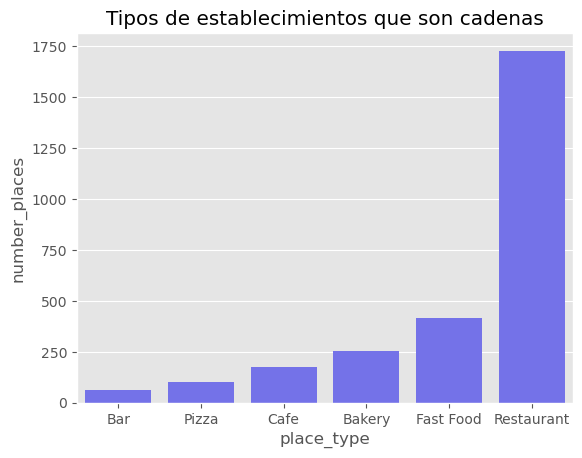

<Figure size 1000x600 with 0 Axes>

In [42]:
plt.style.use('ggplot')
sns.barplot(data=rest_chain_by_type.sort_values('number_places'),x='place_type',y='number_places',color='#615EFC')
plt.title('Tipos de establecimientos que son cadenas')
plt.figure(figsize=(10, 6))

In [43]:
fig = px.pie(rest_chain_by_type,names='place_type',values='number_places',title='Tipos de establecimientos que son parte de una cadena')
fig.show()

Por lo general, la gran mayoría de establecimientos que son parte de una cadena son restaurantes, en comparación a otros tipos de establecimientos. 

### ¿Qué caracteriza a las cadenas: muchos establecimientos con un pequeño número de asientos o unos pocos establecimientos con un montón de asientos?

C:\Users\steph\AppData\Local\Temp\ipykernel_16816\2916850932.py:4: UserWarning:



`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751


c:\Users\steph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Distribución del número de asientos en los locales que son parte de una cadena')

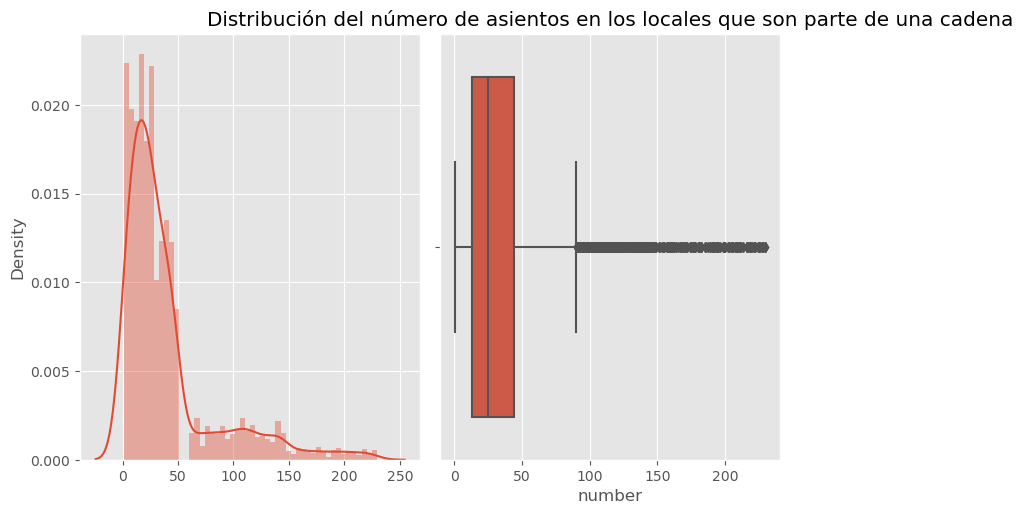

In [44]:
fig, ax = plt.subplots(1,2,figsize=(8, 5))

plt.style.use('ggplot')
sns.distplot(rest_data_chain['number'],ax=ax[0])
sns.boxplot(data=rest_data_chain, x='number',ax=ax[1])
ax[0].set_xlabel('')
plt.tight_layout()
plt.title('Distribución del número de asientos en los locales que son parte de una cadena')

In [45]:
rest_data_chain['number'].describe()

count    3676.000000
mean       39.694233
std        43.437212
min         1.000000
25%        13.000000
50%        25.000000
75%        44.000000
max       229.000000
Name: number, dtype: float64

El histograma permite ver que la gran mayoría de los establecimientos tiene entre 1 a 50 asientos. Asimismo, a partir del gráfico de caja se puede ver que el 75% de los establecimientos tiene menos de 50 asientos y, en comparación, son pocos los locales que tienen más de 100 asientos. Por ello, se puede decir que en el caso de las cadenas existen una gran cantidad de establecimientos con un pequeño número de asientos. 

### Determina el promedio de número de asientos para cada tipo de restaurante. De promedio, ¿qué tipo de restaurante tiene el mayor número de asientos? Traza gráficos.

In [46]:
seats_prom_local_type = rest_data.groupby('place_type')['number'].mean().sort_values(ascending=False).reset_index()
seats_prom_local_type.columns = ['Tipo de establecimiento','Número de asientos']

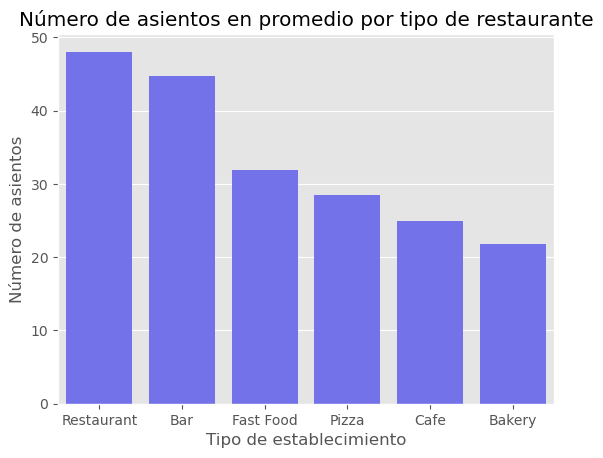

In [47]:

bar= sns.barplot(data=seats_prom_local_type,x='Tipo de establecimiento',y='Número de asientos',color='#615EFC')
plt.title('Número de asientos en promedio por tipo de restaurante')
plt.show()

En promedio los restaurantes tienen el mayor número de asientos, con casi 50 asientos en promedio en cada uno. En segundo lugar se encuentran los bares con alrededor de 45 asientos por local en promedio. Los cafés, por su parte, tienen 25 asientos en promedio.

### Coloca los datos de los nombres de las calles de la columna address en una columna separada.

In [48]:
# función que recorre el dataframe y usa sub para extraer y reemplazar los números de las dirección con espacios en blanco
def extract_letters(address):
    return re.sub(r'^\d+\s+|\s+\d+$','',address)


In [49]:
# se aplica la función a la columna address y se crea la nueva columna que almacenará solo los nombres de las calles
rest_data['street_name'] = rest_data['address'].apply(extract_letters)
rest_data

,id,place_name,address,chain,place_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE


### Traza un gráfico de las diez mejores calles por número de restaurantes.

In [50]:
number_rest_per_street = rest_data.groupby('street_name')['place_name'].nunique()
top_10_streets = number_rest_per_street.sort_values(ascending=False).head(10).reset_index()
top_10_streets.columns = ['street_name','restaurant_number']
top_10_streets

,street_name,restaurant_number
0,W PICO BLVD,298
1,W SUNSET BLVD,297
2,WILSHIRE BLVD,202
3,HOLLYWOOD BLVD,187
4,SANTA MONICA BLVD,185
5,S WESTERN AVE,166
6,W 3RD ST,164
7,S VERMONT AVE,158
8,S FIGUEROA ST,155
9,W OLYMPIC BLVD,149


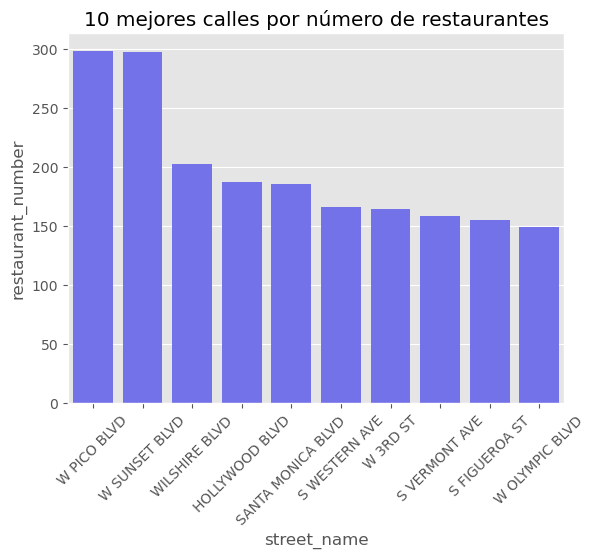

In [51]:
# creación del gráfico
sns.barplot(data=top_10_streets, x='street_name',y='restaurant_number',color='#615EFC')
plt.title('10 mejores calles por número de restaurantes')
plt.xticks(rotation=45)
plt.show()

Entre las 10 mejores calles según número de restaurantes destacan W Pico Blv y W Sunset Blvd con 298 y 297 establecimientos respectivamente. Les siguen calles como Wilshire Blvd con 202 establecimientos y Hollywood Blv con 187 establecimientos. 

### Encuentra el número de calles que solo tienen un restaurante.

In [52]:
rest_data

,id,place_name,address,chain,place_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9646,21432,HALL OF JUSTICE,217 W TEMPLE AVE,False,Restaurant,122,W TEMPLE AVE
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE


In [53]:
# Agrupar por el nombre de la calle y contar el número de restaurantes en cada calle
street_counts = rest_data.groupby('street_name').size()


In [54]:
# se filtran las calles que solo tienen un restaurante
streets_with_one_restaurant = street_counts[street_counts == 1]

In [55]:
# conteo del número de calles que tienen solo un restaurante
number_of_streets_with_one_restaurant = streets_with_one_restaurant.count()
print(f"Número de calles con un solo restaurante: {number_of_streets_with_one_restaurant}")

Número de calles con un solo restaurante: 1717


In [56]:
data_summary = {
    'Tipo': ['1 Restaurante', 'Más de 1 Restaurante'],
    'Número de Calles': [
        (street_counts == 1).sum(),
        (street_counts > 1).sum()
    ]
}

In [57]:
#creación del dataframe a usar para crear el gráfico
summary_df = pd.DataFrame(data_summary)

In [58]:
# creación del pie chart
fig = px.pie(summary_df, names='Tipo', values='Número de Calles', title='Número de calles según la cantidad de restaurantes')
fig.show()

Existen 1717 calles que tienen un solo restaurante, dichas calles representan el 74,5% del total de calles. Solo el 25,5% de las calles tienen más de un restaurante.

### Para las calles con muchos restaurantes, analiza la distribución del número de asientos. ¿Qué tendencias puedes ver?

In [59]:
street_counts

street_name
1/2 3RD ST             1
1/2 7TH ST             1
1/2 BEVERLY BLVD       3
1/2 CITY TERRACE DR    1
1/2 COLORADO BLVD      1
                      ..
YUCCA ST               3
Z00 DR                 1
ZONAL AVE              4
ZOO DR                 1
hollywood BLVD         1
Length: 2306, dtype: int64

In [60]:
# se filtran las calles que tienen más de un restaurante
more_than_one_rest = street_counts[street_counts > 1].index

In [61]:
# se filtra el dataframe general
rest_data_filtered = rest_data[rest_data['street_name'].isin(more_than_one_rest)]
rest_data_filtered

,id,place_name,address,chain,place_type,number,street_name
0,11786,HABITAT COFFEE SHOP,3708 N EAGLE ROCK BLVD,False,Cafe,26,N EAGLE ROCK BLVD
1,11787,REILLY'S,100 WORLD WAY 120,False,Restaurant,9,WORLD WAY
2,11788,STREET CHURROS,6801 HOLLYWOOD BLVD 253,False,Fast Food,20,HOLLYWOOD BLVD
3,11789,TRINITI ECHO PARK,1814 W SUNSET BLVD,False,Restaurant,22,W SUNSET BLVD
4,11790,POLLEN,2100 ECHO PARK AVE,False,Restaurant,20,ECHO PARK AVE
...,...,...,...,...,...,...,...
9645,21431,SAINT MARC,10250 SANTA MONICA BLVD 1025,False,Restaurant,225,SANTA MONICA BLVD
9647,21433,FIN-MELROSE,5750 MELROSE AVE,False,Restaurant,93,MELROSE AVE
9648,21434,JUICY WINGZ,6741 HOLLYWOOD BLVD,True,Fast Food,15,HOLLYWOOD BLVD
9649,21435,MEDIDATE COFFEE,548 S SPRING ST STE 100,False,Cafe,6,S SPRING ST STE


In [62]:
rest_data_filtered['number'].describe()

count    7931.000000
mean       43.941748
std        47.278186
min         1.000000
25%        14.000000
50%        27.000000
75%        46.000000
max       229.000000
Name: number, dtype: float64

c:\Users\steph\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning:

use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.



Text(0.5, 1.0, 'Distribución del número de asientos en las calles con muchos restaurantes')

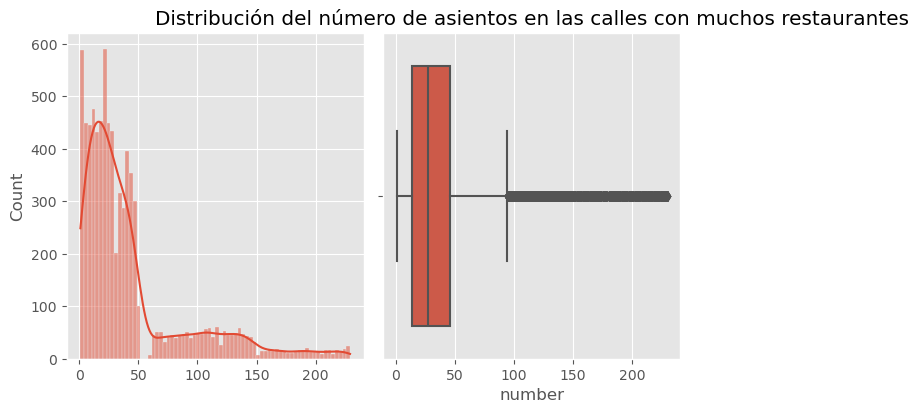

In [66]:
fig, ax = plt.subplots(1,2,figsize=(7, 4))


sns.histplot(rest_data_filtered['number'],ax=ax[0],kde=True)
sns.boxplot(data=rest_data_filtered, x='number',ax=ax[1])
ax[0].set_xlabel('')
plt.tight_layout()
plt.title('Distribución del número de asientos en las calles con muchos restaurantes')


El histograma muestra que, en las calles que tienen varios restaurantes, la gran mayoría de estos tienen entre 0 a 50 asientos. Incluso, el gráfico de caja permite ver que el 75% de los restaurantes tienen menos de 50 asientos y existen pocos casos en los que el número de asientos en dichos restaurantes supera los 100 asientos por local. 

## Conclusiones y recomendaciones

Llega a una conclusión y aporta recomendaciones sobre el tipo de restaurante y el número de asientos. Comenta la posibilidad de desarrollar una cadena.

A partir del análisis realizado se llegan a las siguientes conclusiones:
1. El mercado de establecimientos de comida de Los Ángeles está dominado por los restaurantes, ya que representan el 76,8% de los establecimientos que existen. Por su parte, los cafés solo representan el 3,97% de los establecimientos en esta ciudad. En ese sentido, se considera que una cafetería que es atendida por robots, puede ser un negocio innovador y prometedor en una ciudad en la que principalmente existen restaurantes. 
2. Para abrir un negocio de ese tipo se deben tomar en consideración ciertos criterios. En primer lugar sería recomendable que el número de asientos del negocio no exceda los 50 asientos, ya que la mayoría de establecimientos tiene en promedio entre 20 a 50 asientos y son muy pocos los establecimientos que tienen más de 100 asientos por local. 
3. Asimismo, se recomienda que el negocio se ubique en una de las 10 mejores calles que tienen más cantidad de establecimientos tales como W Pico Blv y W Sunset Blvd. Incluso, podría ubicarse en calles como Wilshire Blvd y Hollywood Blv, las cuales no están tan llenas de restaurantes como sí los están W Pico Blv y W Sunset Blvd.
4. En cuanto a la posibilidad de desarrollar una cadena, se pudo obtener que solo el 31% de los establecimientos en el área pertenecen a una cadena y la gran mayoría de establecimientos que son parte de una cadena son del tipo restaurante. En ese sentido, se recomienda que, en caso se desee desarrollar una cadena, es preferible que el establecimiento sea un restaurante. A su vez, es recomendable que dicho negocio cuente con 50 asientos en promedio o máximo 100 asientos, ya que las cadenas en el área tienden a tener pocos asientos. 

Presentación: https://dochub.com/m/shared-document/daniela-artica/QonjxvZRGWjN5PlR6dl87g/estudio-de-mercado-sprint-10-daniela-artica-pdf?dt=d9w4WzaqeJSS76Wsfz-S